In [1]:
import spatialdata as sd
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq
import anndata as ad

import pickle

/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
#%matplotlib inline
sc.settings.figdir = "fig3"
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(20,20))


In [3]:
#adata=sc.read_h5ad('/nfs/team298/ls34/adult_skin/final_adatas/adata_combined_new.h5ad.v8_nohealthy')
PATH = '/nfs/team298/ls34/adult_skin/final_adatas/adata_combined_new.h5ad.final.filtered'
adata=sc.read_h5ad(PATH)
adata=adata[adata.obs["tech"]=="xenium"].copy()
#adata=sc.read_h5ad('/nfs/team298/ls34/adult_skin/final_adatas/adata_combined_new.h5ad.final.filtered.scrna')



In [4]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)


In [5]:
adata_5k_i=adata[adata.obs["Site_status"].str.startswith("L")]

In [6]:
with open('/nfs/team298/ls34/niche_colors.pkl', 'rb') as f:
    colors_new2 = pickle.load(f)
adata_5k_i.obs['niche19'] =adata_5k_i.obs['niche19'] .astype('category')
adata_5k_i.uns['niche19_colors'] = [colors_new2.get(cat, '#D3D3D3')  # Default to light grey if not found
                                     for cat in adata_5k_i.obs['niche19'].cat.categories]


/tmp/ipykernel_3019422/4125557165.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_5k_i.obs['niche19'] =adata_5k_i.obs['niche19'] .astype('category')


In [7]:
adata_5k_i.obs['niche19'] =adata_5k_i.obs['niche19'] .astype('category')
adata_5k_i.uns['niche19_colors'] = [colors_new2.get(cat, '#D3D3D3')  # Default to light grey if not found
                                     for cat in adata_5k_i.obs['niche19'].cat.categories]

Lesional_CE3-SKI-24-FO-1-S22-A1


/tmp/ipykernel_3019422/2129012152.py:53: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_i.obs["niche19"]=[x if x.startswith("Tz") else "Other" for x in adata_i.obs["niche19"]]
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


BK39_Lesional Baseline


/tmp/ipykernel_3019422/2129012152.py:53: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_i.obs["niche19"]=[x if x.startswith("Tz") else "Other" for x in adata_i.obs["niche19"]]
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


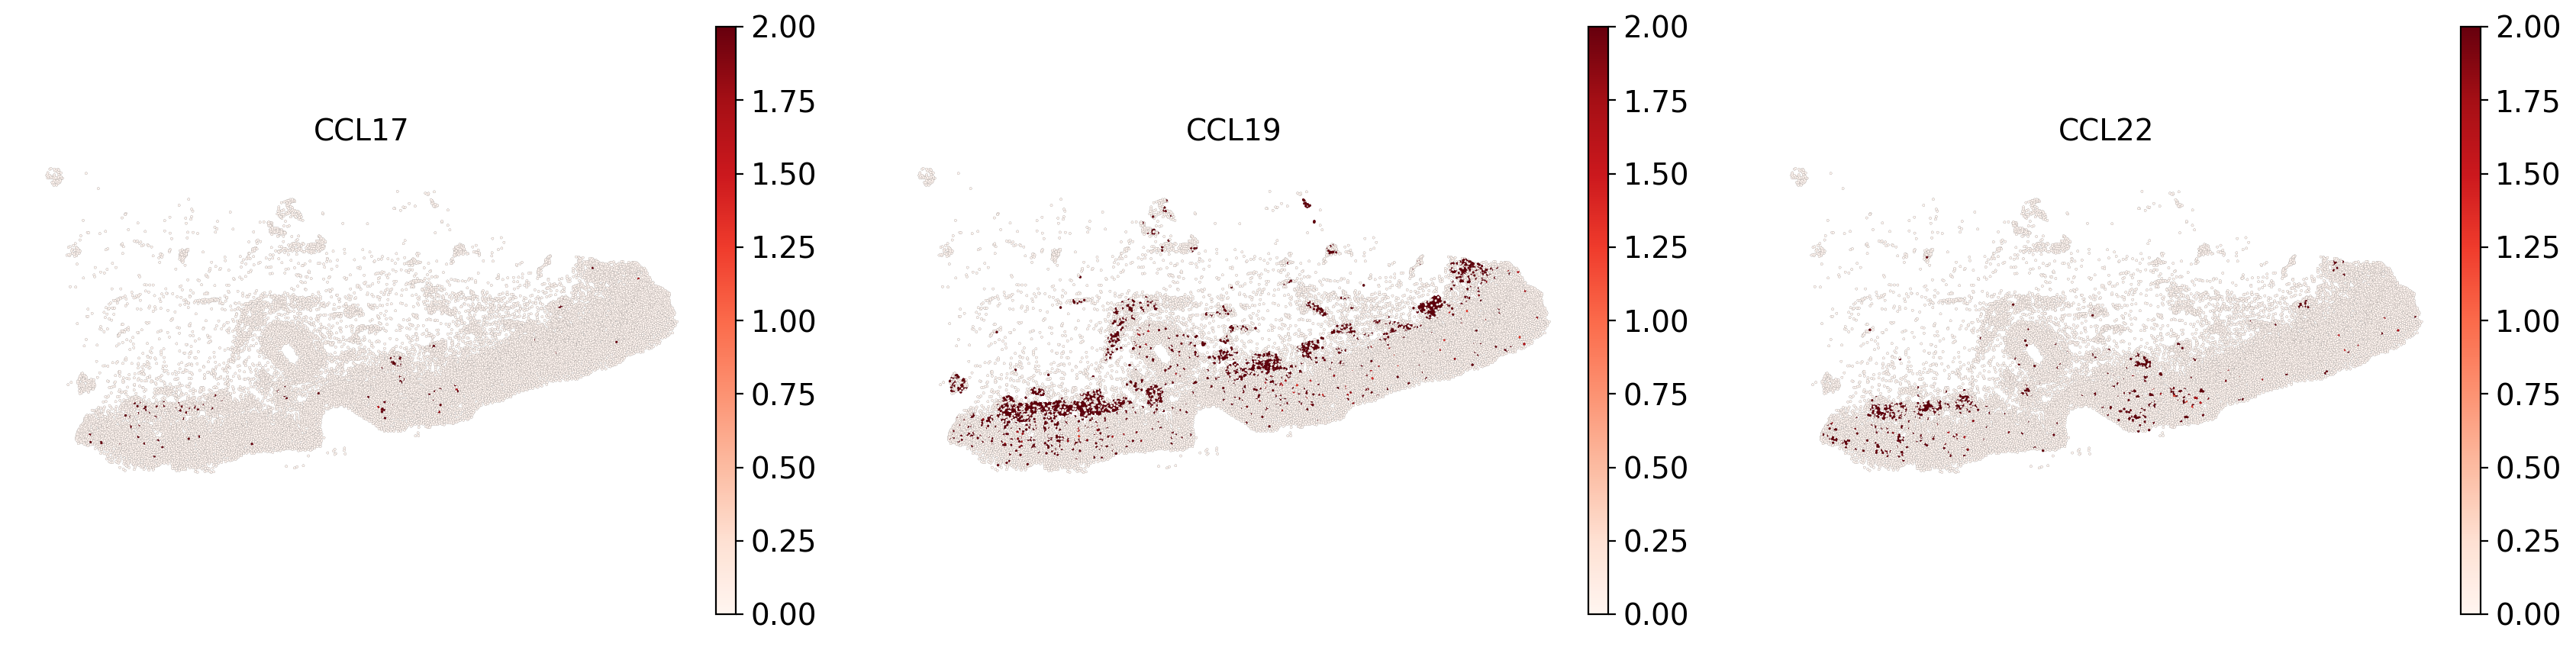

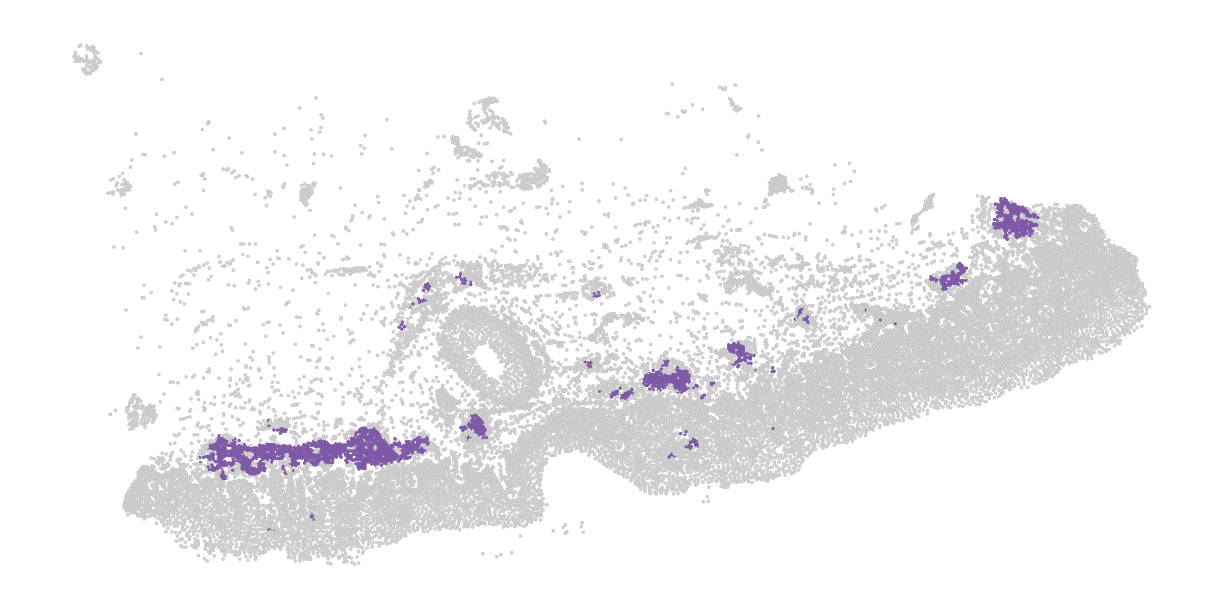

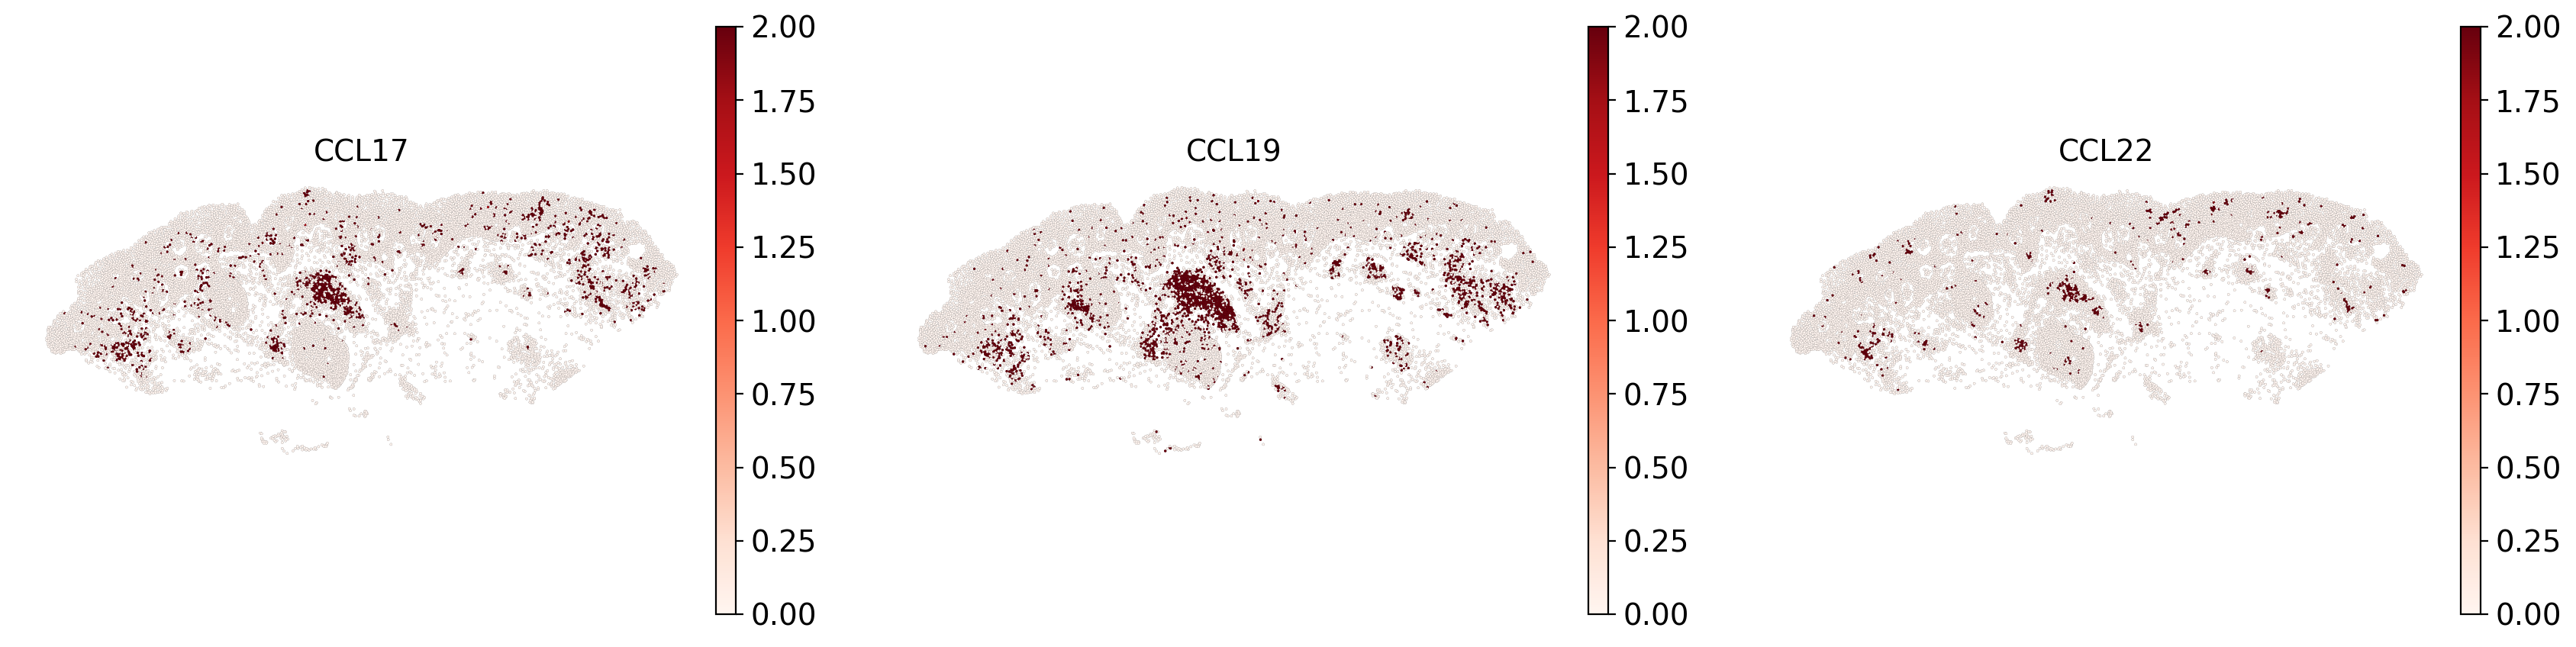

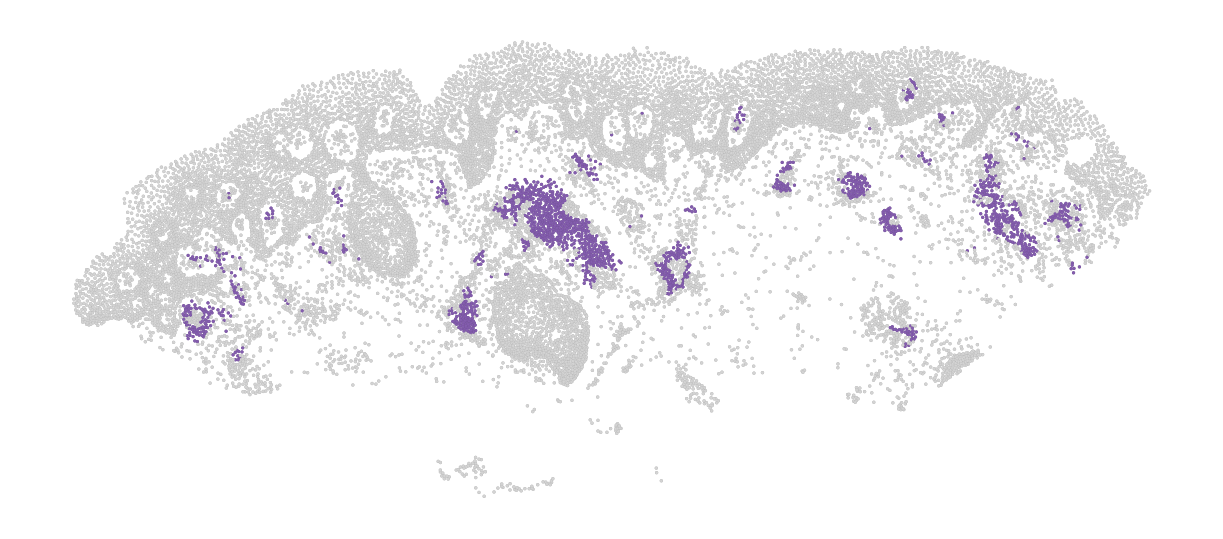

In [8]:
"""
find niche
"""
i=0
# try:i
#     adata_5k.uns.pop('niche_name_colors')
# except:
#     1
sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(6,5))

sample_counts = adata_5k_i.obs["Sanger patient ID"].value_counts()
samples_to_keep = sample_counts[sample_counts > 1000].index

ORDER = []
for i,DONOR_ID in enumerate(["CE3", "BK39"]):
   # print(i+1, "/", len(samples_to_keep))
    adata_i =  adata_5k_i[adata_5k_i.obs["Sanger patient ID"]==DONOR_ID]
    STATUS =  adata_i.obs["Site_status"].unique()[0]

    #RUN_ID = list(adata_i.obs.RUN_ID.unique())[0]
    INFO_ID = list(adata_i.obs.info_id2.unique())[0]
    print(INFO_ID)
    #del(adata_i.uns["combined_annotation2_colors"])
    #ORDER.append(tissue_section_id)
 
#             print(tissue_section_id)
   # adata_i=adata_i[adata_i.obs["niche11"].str.startswith("Epi")]
    sq.pl.spatial_scatter(
        adata_i,#[adata_i.obs["Timepoint"].str.startswith("Les")],
        library_id="spatial",
        shape=None,
        color=["CCL17", "CCL19", "CCL22"],
        size=5,
        #title=str(STATUS) + "_" + DONOR_ID + "\n" + str(adata_i.shape[0]),
        #title=INFO_ID, #+ "_nonlesional",
        #legend_loc=None,
        # legend_loc="on data",
                edgecolor="black",
        linewidth=0.03,
                legend_fontsize=12,
        cmap="Reds",
                vmax=2,
                save=f"3f_{DONOR_ID}_chemokines.pdf"


    

        #ax=ax,
        #legend_loc="on data"  # Disable the legend for each subplot
    )
#     if i>1:
#         break
    adata_i.obs["niche19"]=[x if x.startswith("Tz") else "Other" for x in adata_i.obs["niche19"]]
    adata_i.uns.pop('niche19_colors')
    adata_i.obs['niche19'] =adata_i.obs['niche19'] .astype('category')
    adata_i.uns['niche19_colors'] = [colors_new2.get(cat, '#D3D3D3')  # Default to light grey if not found
                                     for cat in adata_i.obs['niche19'].cat.categories]
    sq.pl.spatial_scatter(
        adata_i,#[adata_i.obs["Timepoint"].str.startswith("Les")],
        library_id="spatial",
        shape=None,
        color="niche19",
        size=5,
        title="",
        #title=INFO_ID, #+ "_nonlesional",
        legend_loc=None,
        # legend_loc="on data",
                edgecolor="black",
        linewidth=0.01,
                legend_fontsize=12,
        save=f"3f_{DONOR_ID}.pdf"
        #cmap="Reds",
               # vmax=2,

    

       
    )


# extended fig f

Lesional_CE3-SKI-24-FO-1-S22-A1
BK39_Lesional Baseline


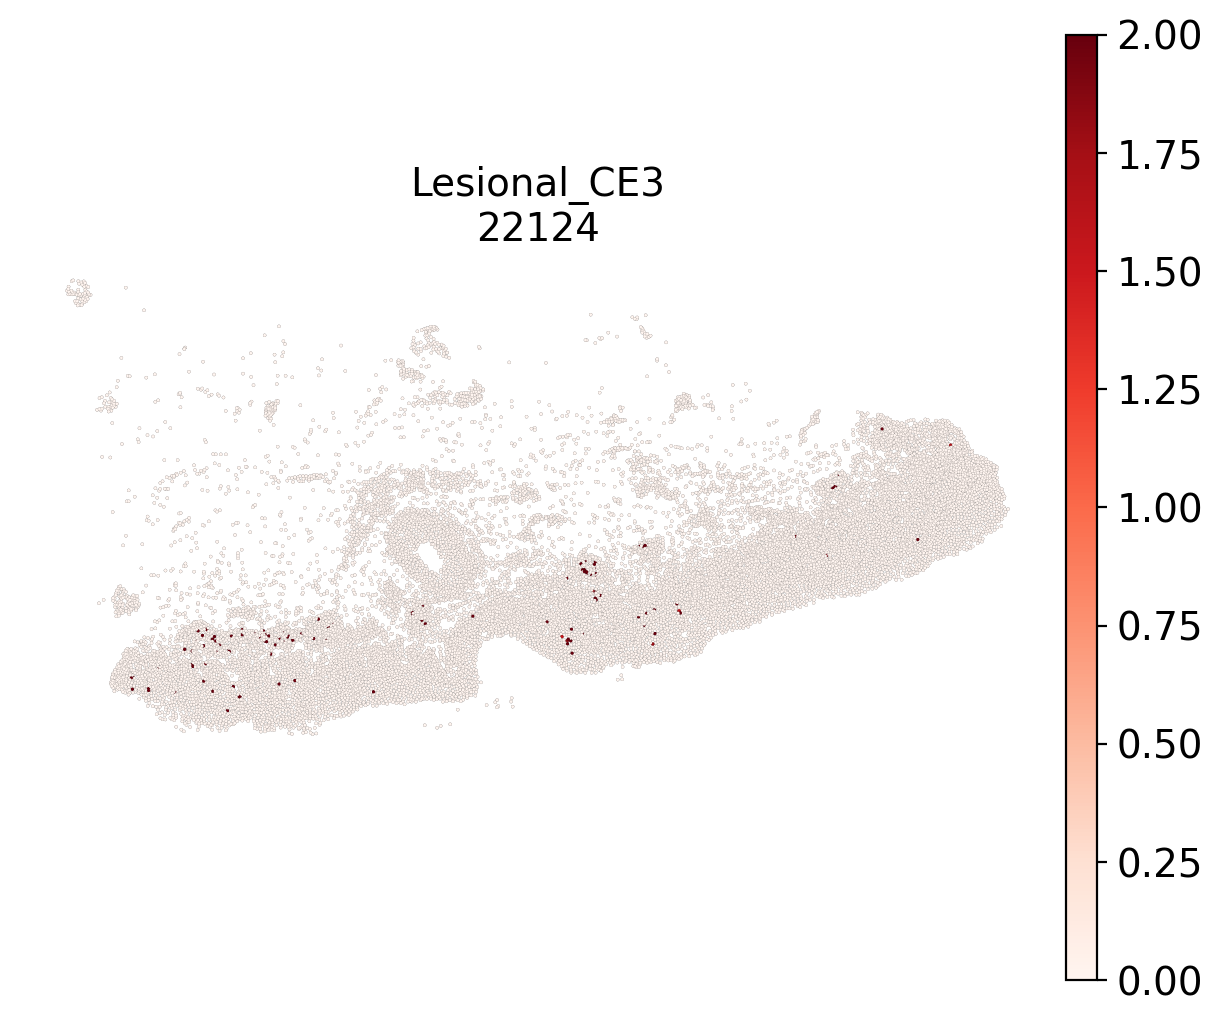

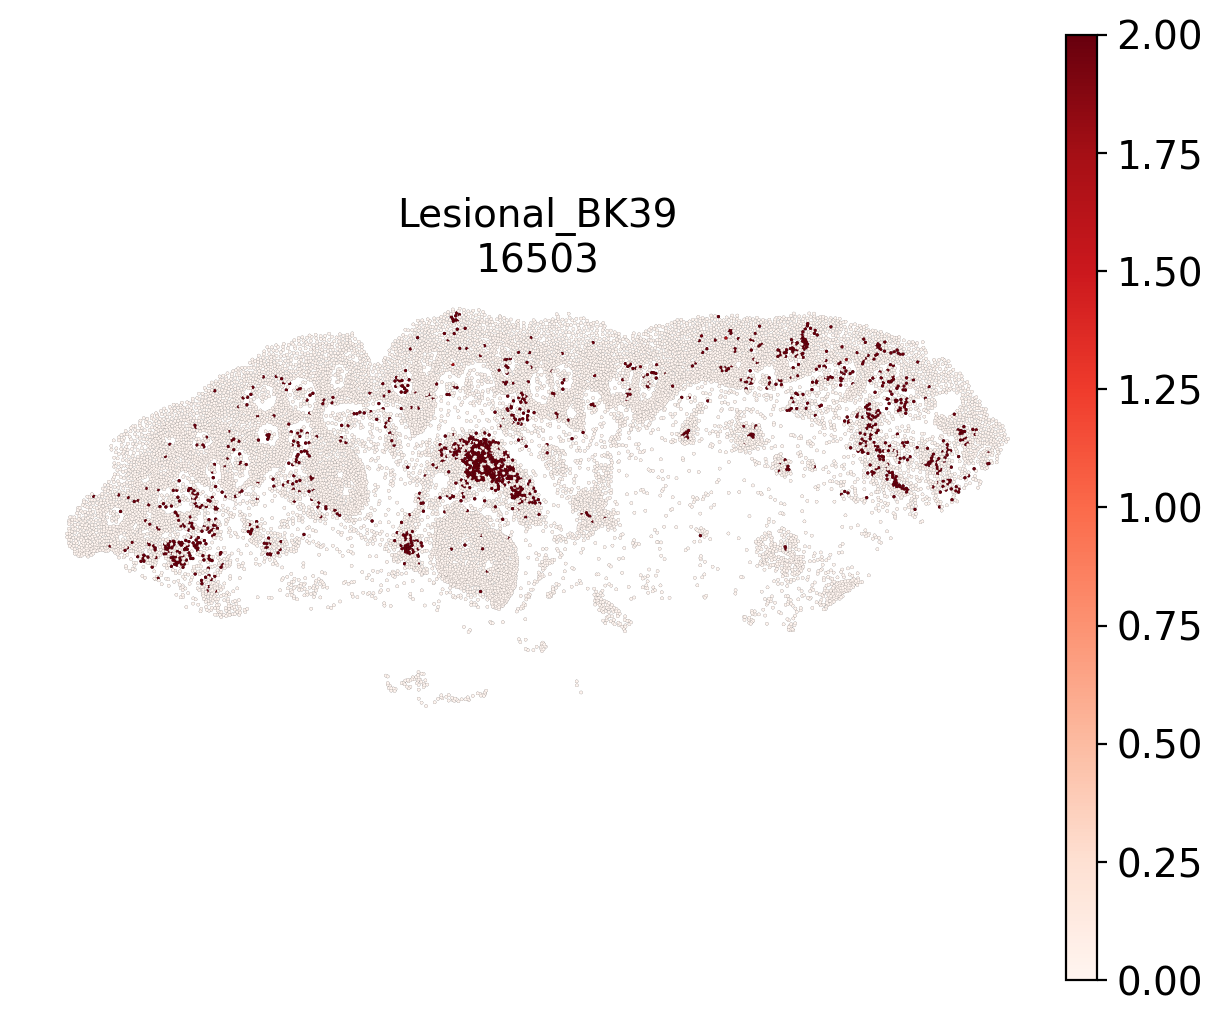

In [10]:

i=0

sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(6,5))

sample_counts = adata_5k_i.obs["Sanger patient ID"].value_counts()
samples_to_keep = sample_counts[sample_counts > 1000].index

ORDER = []
for i,DONOR_ID in enumerate(["CE3", "BK39"]):
   # print(i+1, "/", len(samples_to_keep))
    adata_i =  adata_5k_i[adata_5k_i.obs["Sanger patient ID"]==DONOR_ID]
    STATUS =  adata_i.obs["Site_status"].unique()[0]

    #RUN_ID = list(adata_i.obs.RUN_ID.unique())[0]
    INFO_ID = list(adata_i.obs.info_id2.unique())[0]
    print(INFO_ID)
    #del(adata_i.uns["combined_annotation2_colors"])
    #ORDER.append(tissue_section_id)
#     niche_names_found = adata_i.obs["niche_name"].unique()
   
#     if NICHE in niche_names_found:
#         adata_ii =  adata_i[adata_i.obs["niche_name"]==NICHE]
#         if adata_ii.shape[0] > 10:
#     #         if i ==0:

#     #             sq.pl.spatial_scatter(
#     #                 adata_i,
#     #                 library_id="spatial",
#     #                 shape=None,
#     #                 color="niche_name",
#     #                 size=1,
#     #                 vmax=1,
#     #                 title=tissue_section_id,
#     #                 #ax=ax,
#     #                 #legend_loc="on data"  # Disable the legend for each subplot
#     #             )       
#             i=i+1

#             print(tissue_section_id)
   # adata_i=adata_i[adata_i.obs["niche11"].str.startswith("Epi")]
    sq.pl.spatial_scatter(
        adata_i,#[adata_i.obs["Timepoint"].str.startswith("Les")],
        library_id="spatial",
        shape=None,
        color="CCL17",
        size=5,
        title=str(STATUS) + "_" + DONOR_ID + "\n" + str(adata_i.shape[0]),
        #title=INFO_ID, #+ "_nonlesional",
        #legend_loc=None,
        # legend_loc="on data",
                edgecolor="black",
        linewidth=0.03,
                legend_fontsize=12,
        cmap="Reds",
                vmax=2,

    

        #ax=ax,
        #legend_loc="on data"  # Disable the legend for each subplot
    )


Lesional_CE3-SKI-24-FO-1-S22-A1
BK39_Lesional Baseline


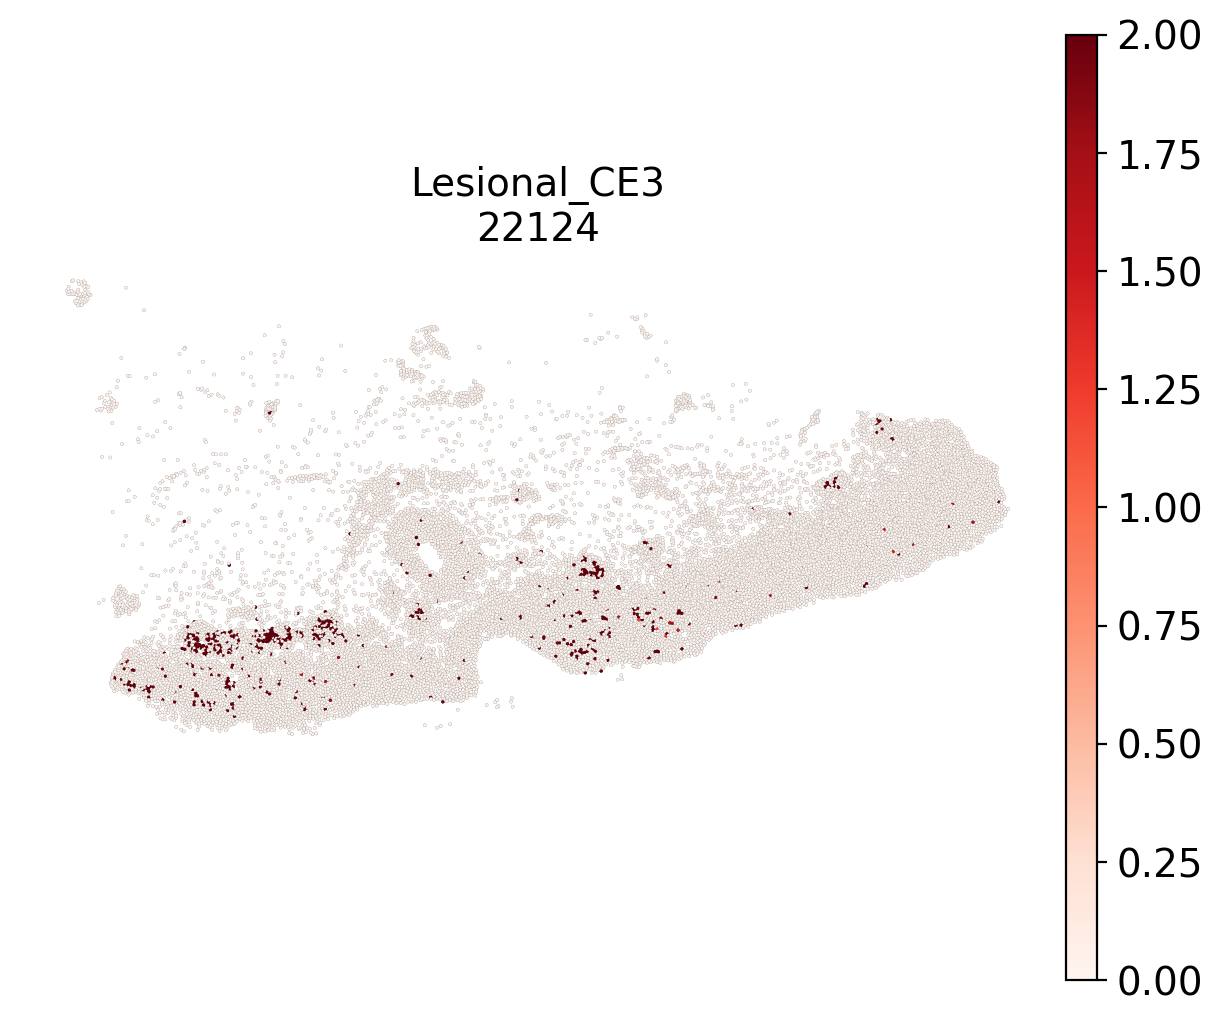

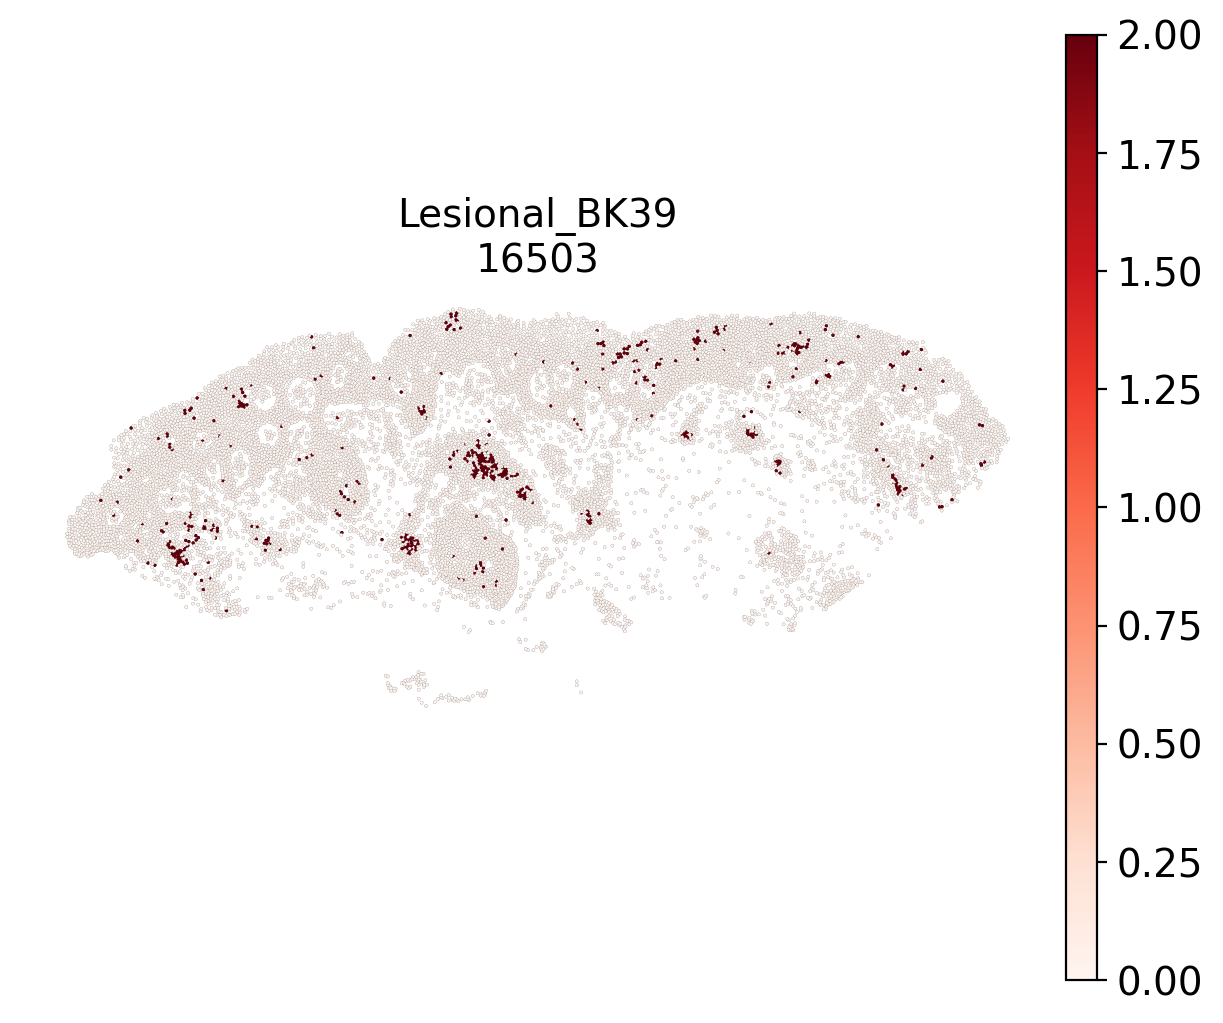

In [11]:
"""
find niche
"""
i=0
# try:i
#     adata_5k.uns.pop('niche_name_colors')
# except:
#     1
sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(6,5))

sample_counts = adata_5k_i.obs["Sanger patient ID"].value_counts()
samples_to_keep = sample_counts[sample_counts > 1000].index

ORDER = []
for i,DONOR_ID in enumerate(["CE3", "BK39"]):
   # print(i+1, "/", len(samples_to_keep))
    adata_i =  adata_5k_i[adata_5k_i.obs["Sanger patient ID"]==DONOR_ID]
    STATUS =  adata_i.obs["Site_status"].unique()[0]

    #RUN_ID = list(adata_i.obs.RUN_ID.unique())[0]
    INFO_ID = list(adata_i.obs.info_id2.unique())[0]
    print(INFO_ID)
    #del(adata_i.uns["combined_annotation2_colors"])
    #ORDER.append(tissue_section_id)
#     niche_names_found = adata_i.obs["niche_name"].unique()
   
#     if NICHE in niche_names_found:
#         adata_ii =  adata_i[adata_i.obs["niche_name"]==NICHE]
#         if adata_ii.shape[0] > 10:
#     #         if i ==0:

#     #             sq.pl.spatial_scatter(
#     #                 adata_i,
#     #                 library_id="spatial",
#     #                 shape=None,
#     #                 color="niche_name",
#     #                 size=1,
#     #                 vmax=1,
#     #                 title=tissue_section_id,
#     #                 #ax=ax,
#     #                 #legend_loc="on data"  # Disable the legend for each subplot
#     #             )       
#             i=i+1

#             print(tissue_section_id)
   # adata_i=adata_i[adata_i.obs["niche11"].str.startswith("Epi")]
    sq.pl.spatial_scatter(
        adata_i,#[adata_i.obs["Timepoint"].str.startswith("Les")],
        library_id="spatial",
        shape=None,
        color="CCL22",
        size=5,
        title=str(STATUS) + "_" + DONOR_ID + "\n" + str(adata_i.shape[0]),
        #title=INFO_ID, #+ "_nonlesional",
        #legend_loc=None,
        # legend_loc="on data",
                edgecolor="black",
        linewidth=0.03,
                legend_fontsize=12,
        cmap="Reds",
                vmax=2,

    

        #ax=ax,
        #legend_loc="on data"  # Disable the legend for each subplot
    )


In [12]:
adata_5k_i.obs["Site_status_simple"].value_counts()

Site_status_simple
Lesional    231621
Name: count, dtype: int64

/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  

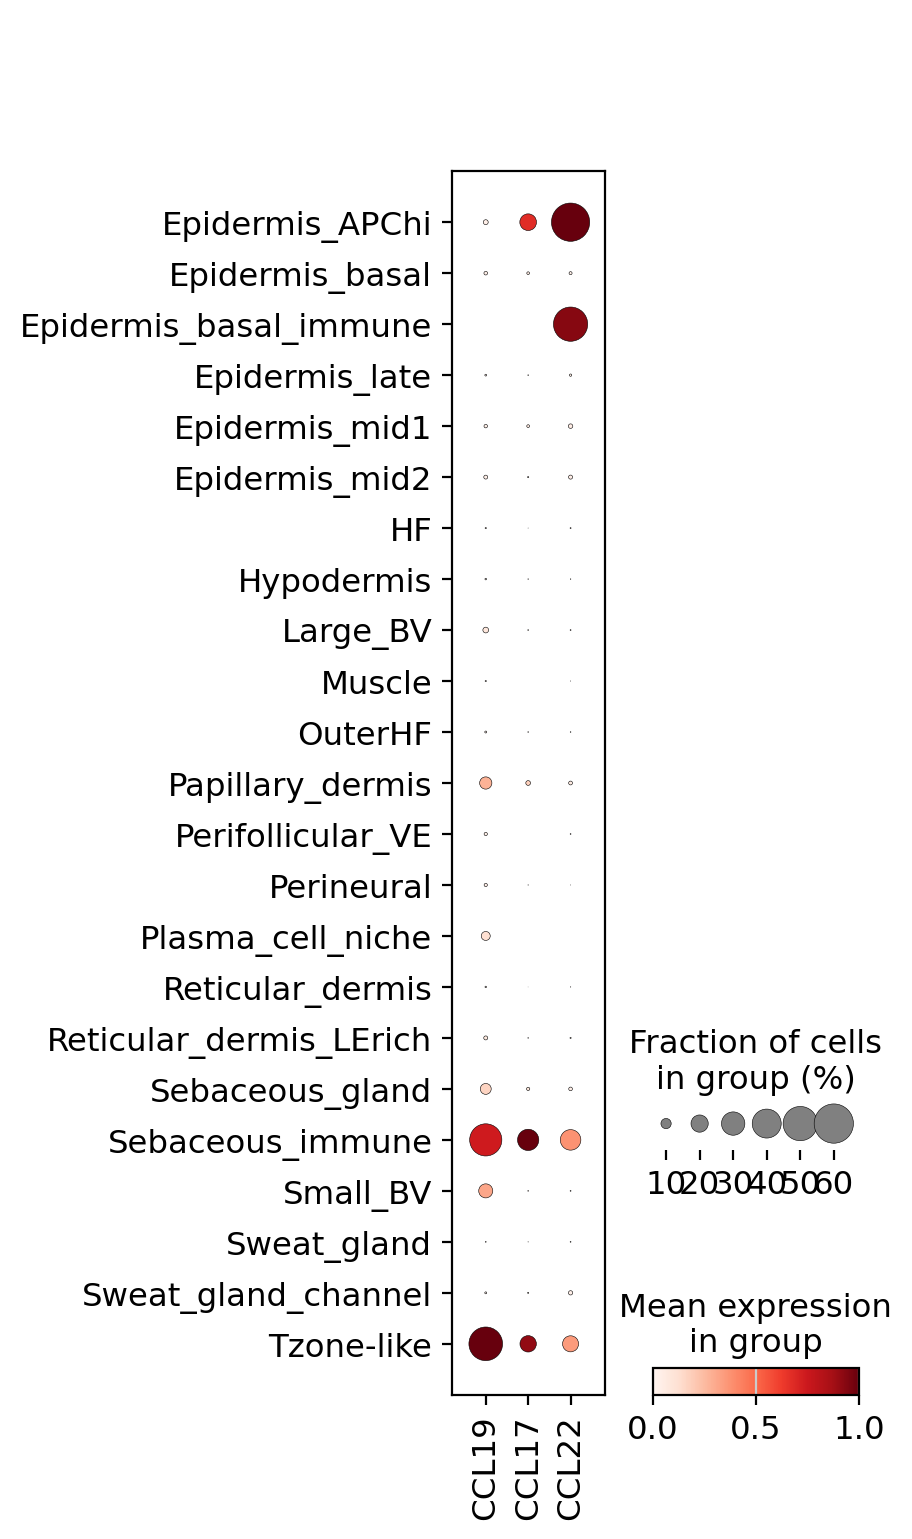

In [13]:
sc.pl.dotplot(adata_5k_i, 
              ["CCL19", "CCL17", "CCL22"],
              groupby="niche12",
              dendrogram=False, 
                standard_scale="var",
             )

/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  

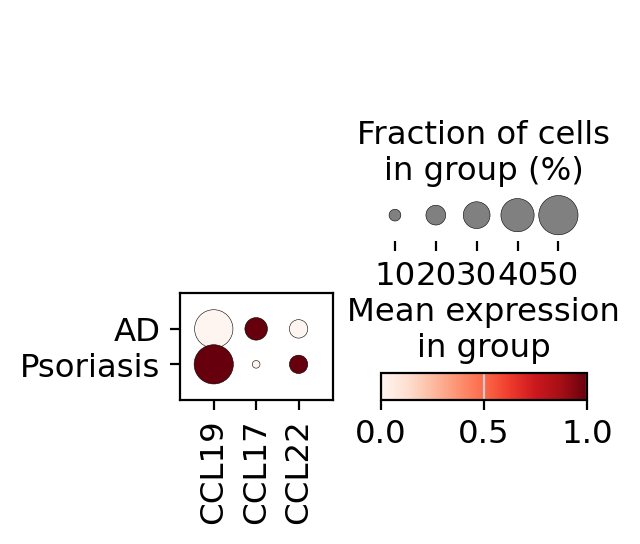

In [14]:
sc.pl.dotplot(adata_5k_i[adata_5k_i.obs["niche12"]=="Tzone-like"], 
              ["CCL19", "CCL17", "CCL22"],
              groupby="disease_overall",
              dendrogram=False, 
                standard_scale="var",
             )